# Forest Fire Analysis

### Felix Egwuagu, Kidus Gorfe, Ellis Porter 

In [7]:
# dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
# from pprint import pprint
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


import warnings
warnings.filterwarnings('ignore')

In [8]:
# Import data from csv

fire_df = pd.read_csv("Resources/forestfires.csv")

fire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Column Descriptions

For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

   3. month - month of the year: 'jan' to 'dec' 

   4. day - day of the week: 'mon' to 'sun'

   5. Fine Fuel Moisture Code (FFMC) - moisture condition of forest litter fuels (16hr)

   6. Duff Moisture Code (DMC) - moisture condition of duff under forest litter (360hr)

   7. Drought Code (DC) - moisture condition of deep soil (1272hr)

   8. Initial Spread Index (ISI) - spread potential based on FFMC and windspeed

   9. temp - temperature in Celsius

   10. Relative Humidity (RH) - relative humidity in %

   11. wind - wind speed in km/h

   12. rain - outside rain in mm/(m^2)

   13. area - the burned area of the forest (in ha)


# Data Description

##### Montesinho National Park, north east Portugal
##### January 2000 to December 2003


In [9]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [10]:
fire_df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [11]:
# drop NA
fire_df = fire_df.dropna(how='any')
fire_df.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

# Total Area Affected by Fire

### Per Month

In [12]:
# rename months and days
months_ordered = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

months_rename = fire_df.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], months_ordered)
rename_df = months_rename.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], days_ordered)

rename_df['month'] = pd.Categorical(rename_df['month'], categories=months_ordered, ordered=True)

sort_by_months = rename_df.sort_values(by="month")
sort_by_months

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
104,2,4,January,Saturday,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
379,4,5,January,Sunday,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
96,3,4,February,Saturday,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
59,2,2,February,Friday,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
202,7,4,February,Sunday,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,December,Wednesday,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
281,6,5,December,Tuesday,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77
273,4,6,December,Sunday,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
279,4,4,December,Monday,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77


In [13]:
# group by months
month_group = rename_df.groupby("month")

# total area affected per month
area_per_month = month_group["area"].sum()
area_per_month

month
January         0.00
February      125.50
March         235.26
April          80.02
May            38.48
June           99.30
July          459.83
August       2297.99
September    3086.13
October        99.57
November        0.00
December      119.97
Name: area, dtype: float64

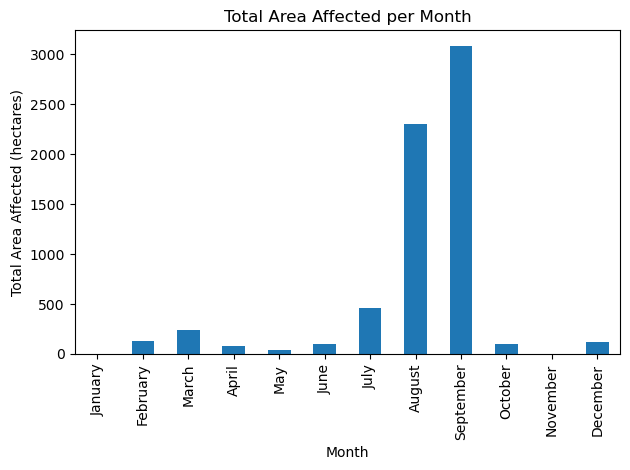

In [14]:
# graph area affected per month

area_per_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Total Area Affected (hectares)")
plt.title("Total Area Affected per Month")
plt.style.use('ggplot')
plt.tight_layout()

plt.savefig("Images/area_per_month.png")
plt.show()

# Total Area Affected by Fire

### Per Day of Week

In [15]:
rename_df['day'] = pd.Categorical(rename_df['day'], categories=days_ordered, ordered=True)
sort_by_day = rename_df.sort_values(by="day")

# group by day
day_group = rename_df.groupby("day", observed=False)

# total area affected per day
area_per_day = day_group["area"].sum()
area_per_day

day
Monday        706.53
Tuesday       807.79
Wednesday     578.60
Thursday      997.10
Friday        447.24
Saturday     2144.86
Sunday        959.93
Name: area, dtype: float64

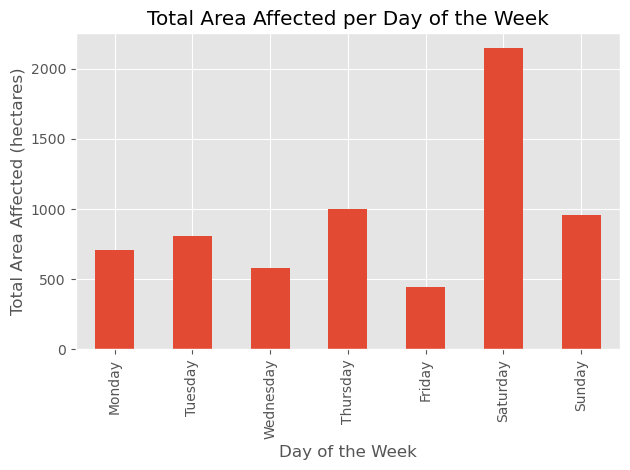

In [16]:
# graph area affected per day

area_per_day.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Total Area Affected (hectares)")
plt.title("Total Area Affected per Day of the Week")
plt.style.use('ggplot')
plt.tight_layout()

plt.savefig("Images/area_per_day.png")
plt.show()

# Drop 0.0 Area

In [17]:
# drop 0.0 area rows
non0_df= rename_df[rename_df["area"] != 0]
non0_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 138 to 514
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X       270 non-null    int64   
 1   Y       270 non-null    int64   
 2   month   270 non-null    category
 3   day     270 non-null    category
 4   FFMC    270 non-null    float64 
 5   DMC     270 non-null    float64 
 6   DC      270 non-null    float64 
 7   ISI     270 non-null    float64 
 8   temp    270 non-null    float64 
 9   RH      270 non-null    int64   
 10  wind    270 non-null    float64 
 11  rain    270 non-null    float64 
 12  area    270 non-null    float64 
dtypes: category(2), float64(8), int64(3)
memory usage: 26.6 KB


In [18]:
# rename months and days

non0_months_rename = non0_df.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], months_ordered)
non0_rename_df = non0_months_rename.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], days_ordered)

non0_rename_df['month'] = pd.Categorical(non0_rename_df['month'], categories=months_ordered, ordered=True)

# Days with Active Fire

In [19]:
non0_sort_by_months = non0_rename_df.sort_values(by="month")

# group by months
non0_month_group = non0_rename_df.groupby("month")

# count fires per month
non0_fires_per_month = non0_month_group["month"].count()
non0_fires_per_month

month
January       0
February     10
March        19
April         4
May           1
June          8
July         18
August       99
September    97
October       5
November      0
December      9
Name: month, dtype: int64

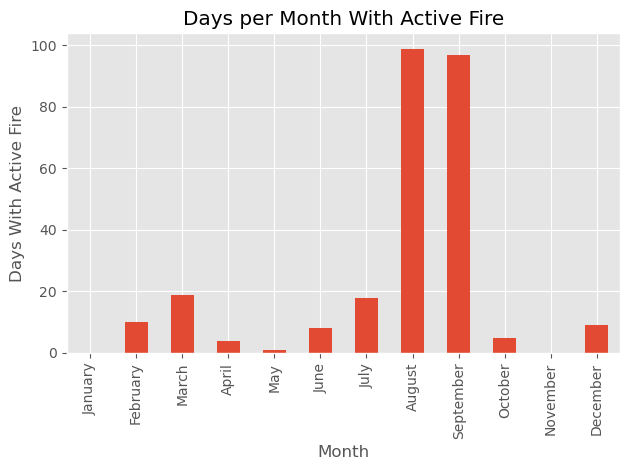

In [20]:
# graph fires per month
non0_fires_per_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Days With Active Fire")
plt.title("Days per Month With Active Fire")
plt.style.use('ggplot')
plt.tight_layout()

plt.savefig("Images/fire_per_month.png")
plt.show()

In [21]:
non0_rename_df['day'] = pd.Categorical(non0_rename_df['day'], categories=days_ordered, ordered=True)
non0_sort_by_day = non0_rename_df.sort_values(by="day")

# group by day
non0_day_group = non0_rename_df.groupby("day")

# count fires per month
non0_fires_per_day = non0_day_group["day"].count()
non0_fires_per_day

day
Monday       39
Tuesday      36
Wednesday    32
Thursday     31
Friday       43
Saturday     42
Sunday       47
Name: day, dtype: int64

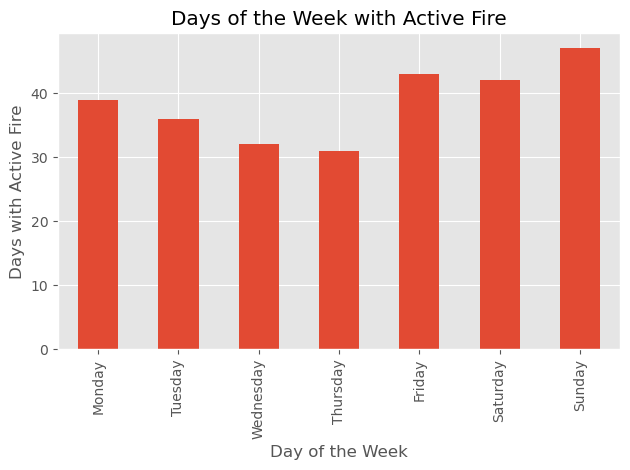

In [22]:
# graph fires per day of the week
non0_fires_per_day.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Days with Active Fire")
plt.title("Days of the Week with Active Fire")
plt.style.use('ggplot')
plt.tight_layout()

plt.savefig("Images/fire_per_day.png")
plt.show()